<a href="https://colab.research.google.com/github/Lee-Dongsu/AIFFEL_quest_cr/blob/master/MainQuest/Quest02/MainQuest02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦄 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

## 목차

- 회고

1. 포켓몬 데이터 셋 불러오기
2. 포켓몬 파헤치기
3. 일반 포켓몬과 전설의 포켓몬의 차이
4. 모델에 적용하기 위한 데이터 전처리
5. 베이스라인 만들기
6. 의사 결정 트리 모델을 이용한 학습 시키기
7. 피쳐 엔지니어링 데이터로 학습 시키기

## 회고
```
전체적인 모델 훈련 과정을 직접 해보면서 이제 시작이지만 아직 많이 멀었다는게 느껴졌다.
노드가 없었다면 처음부터 직접 하는 것은 불가능 했을것이다...
코랩에 데이터를 올리는 과정부터 잘 기억이 나지 않아 처음부터 다시 하는 과정을 거쳤다.
노드의 도움을 많이 받아 데이터 전처리를 하나씩 해냈지만, seaborn, maplotlib을 활용하는 과정에서 많이 부족한 점이 느껴졌다.
데이터 전처리 과정이 생각보다 오래 걸린다는 것이 느껴졌고, 아직 데이터를 정제하기엔 많이 부족하다고 느껴졌다.
데이터 정제를 하기 위한 기초 개념이 많이 부족해 친숙해질 필요가 있을 것 같다.
모델을 훈련하는 과정에서도 딥러닝 공부를 할때보다
아이리스 데이터를 배울때 근소하게 더 어려운 점이 있었던 것 같은데 그것또한 해당 과정에 어려움을 준 부분이 있는 것 같다.
데이터 전처리 - 모델 훈련 과정을 최대한 많이 접해 보아야 할 것 같다.
그것을 위한 데이터 분석 및 머신러닝 학습에 대한 필요성을 느꼈다.
```

## 1. 포켓몬 데이터 셋 불러오기

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [145]:
import os
csv_path = "/content/sample_data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [146]:
# 포켓몬 변수에 데이터 저장
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 2. 포켓몬 파헤치기

In [147]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [148]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [149]:
# 결측치 확인
pokemon.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [150]:
# 포켓몬 종류 확인
pokemon_type = set(pokemon["Name"])
print(len(pokemon_type))

800


In [151]:
# 포켓몬 타입 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Bug', 'Electric', 'Flying', 'Normal', 'Rock', 'Fire', 'Ice', 'Fighting', 'Dark', 'Steel', 'Dragon', 'Ground', 'Grass', 'Poison', 'Water', 'Fairy', 'Ghost', 'Psychic']


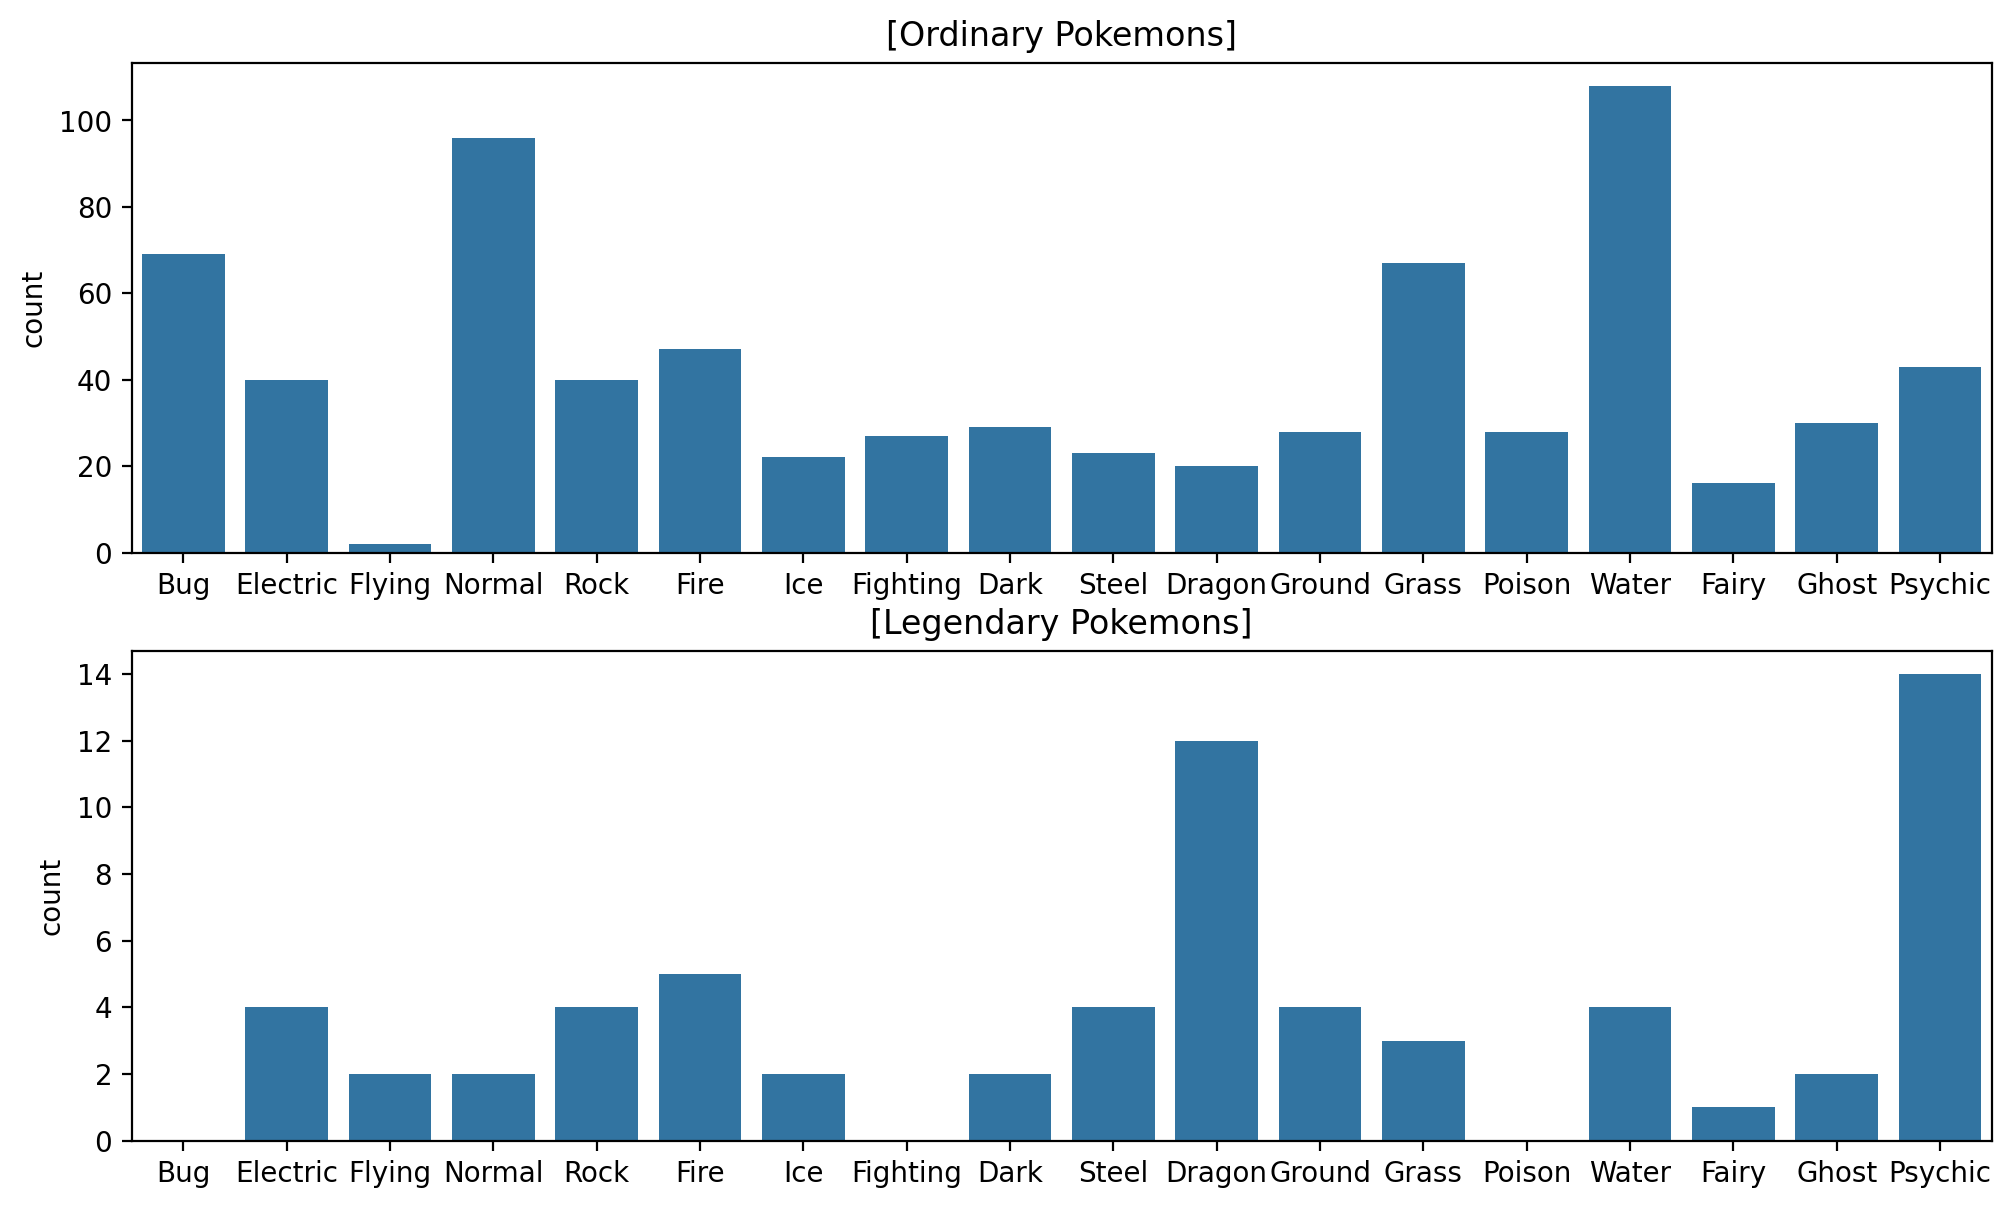

In [152]:
# 일반 포켓몬과 전설의 포켓몬 Type 1 분포 확인
plt.figure(figsize=(12, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [153]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


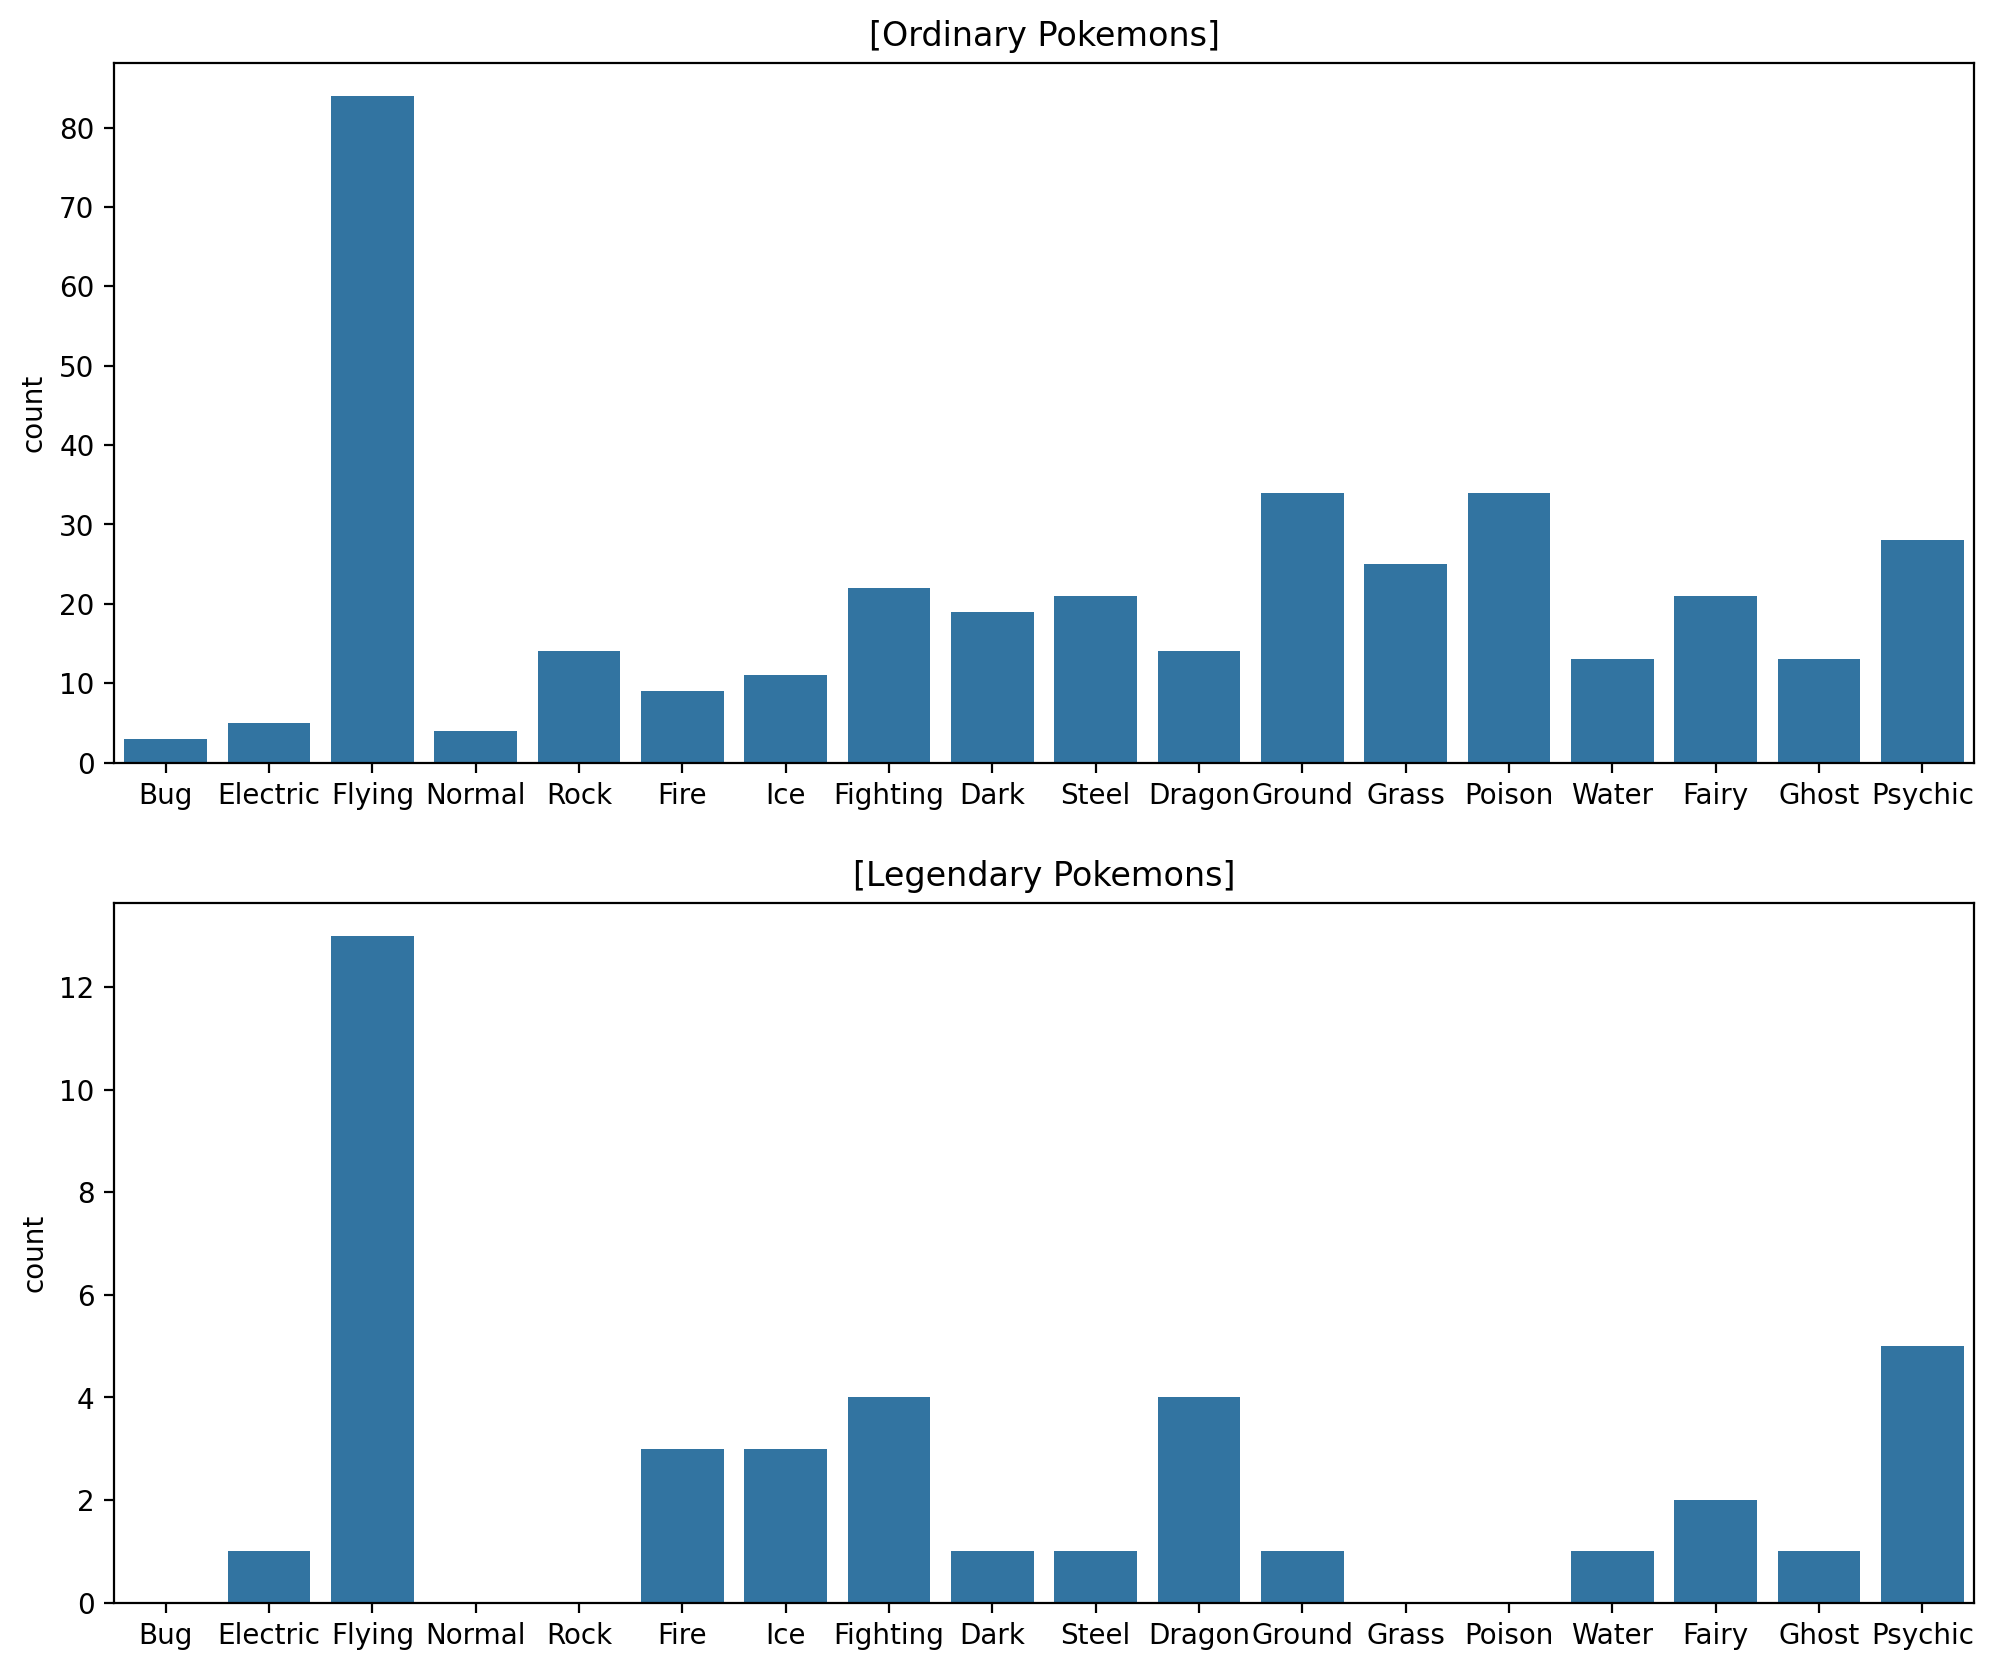

In [154]:
# 일반 포켓몬과 전설의 포켓몬 Type 2 분포 확인
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [155]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [156]:
# 모든 스탯의 종류 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [157]:
# 첫번째 포켓몬 검증
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [158]:
# Total값과 모든 stats의 총합이 같은 포켓몬은 전체 데이터의 수
is_total_match = (pokemon['Total'] == pokemon[stats].sum(axis=1))

# 일치하는 조건의 True 개수 세기
matching_count = is_total_match.sum()

print(matching_count)

800


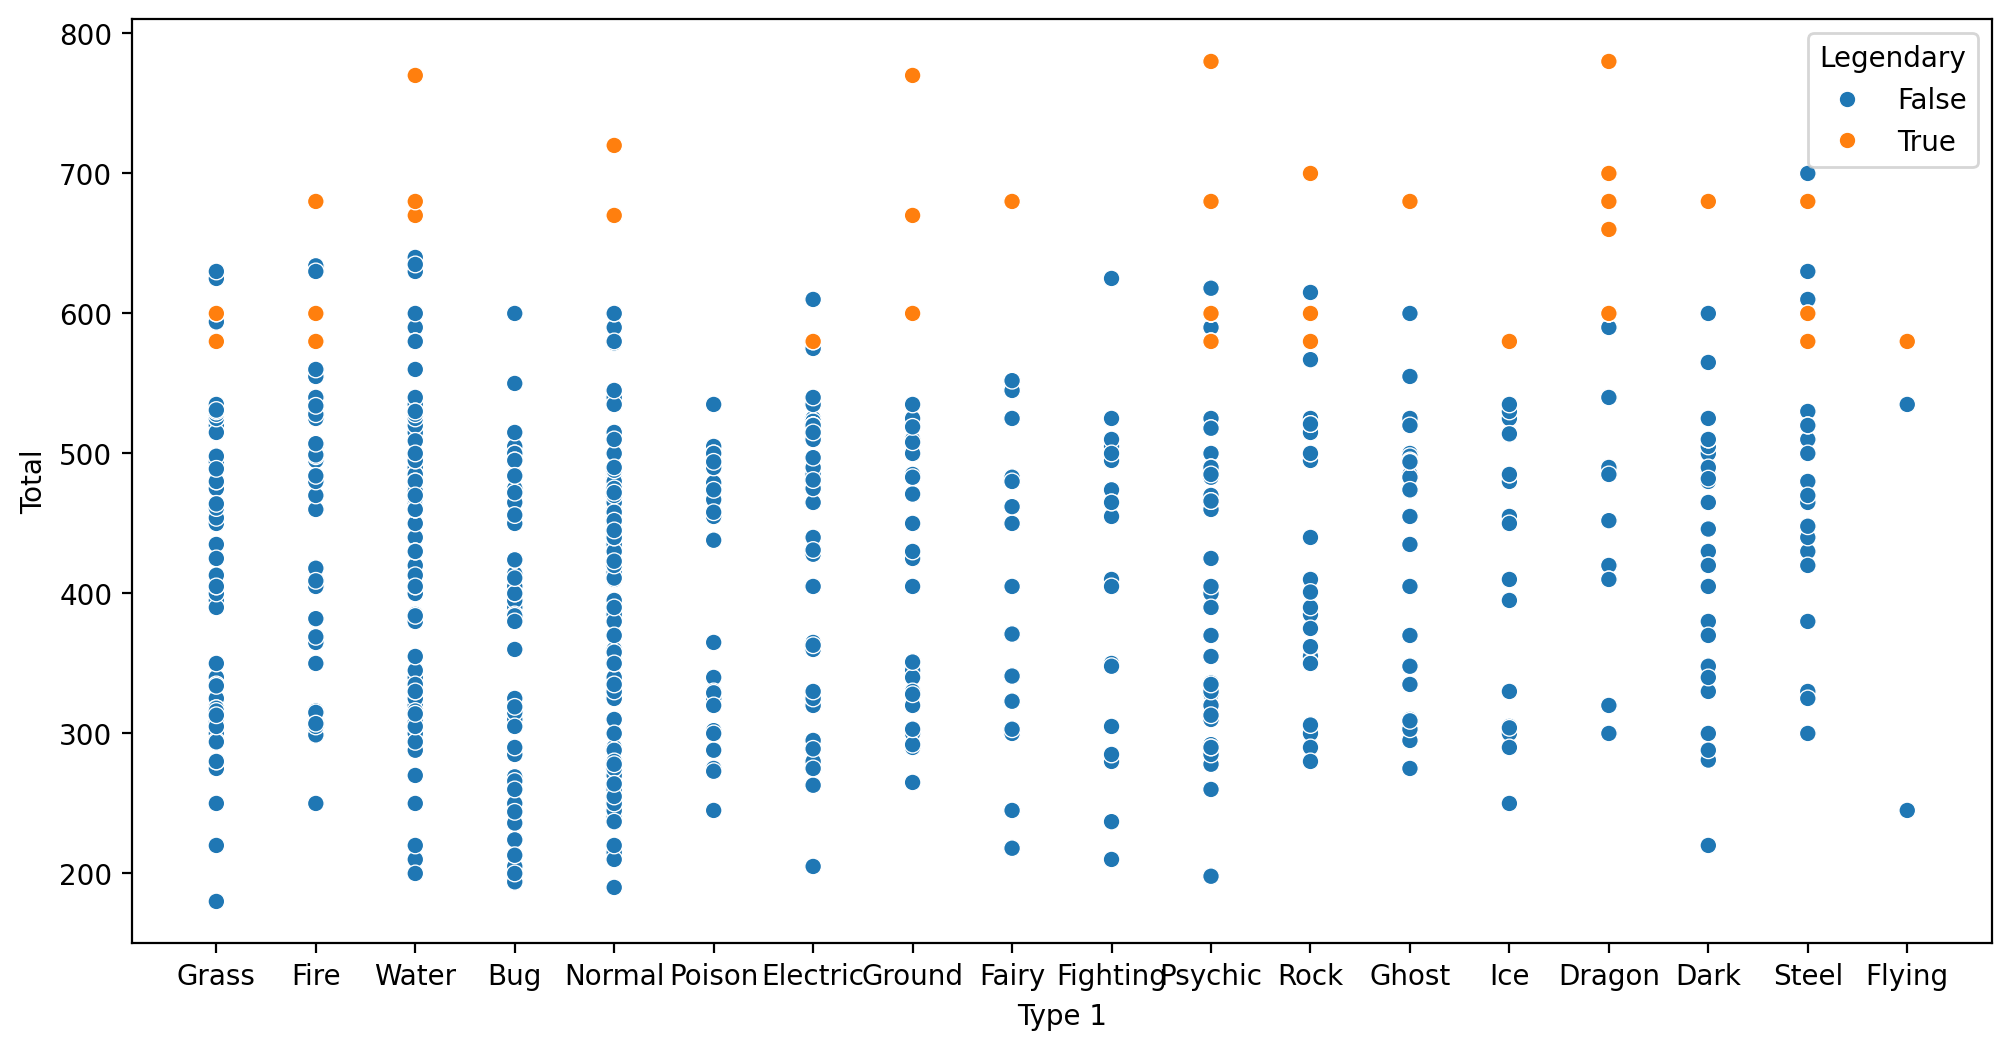

In [159]:
# Total 값 분포 확인
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

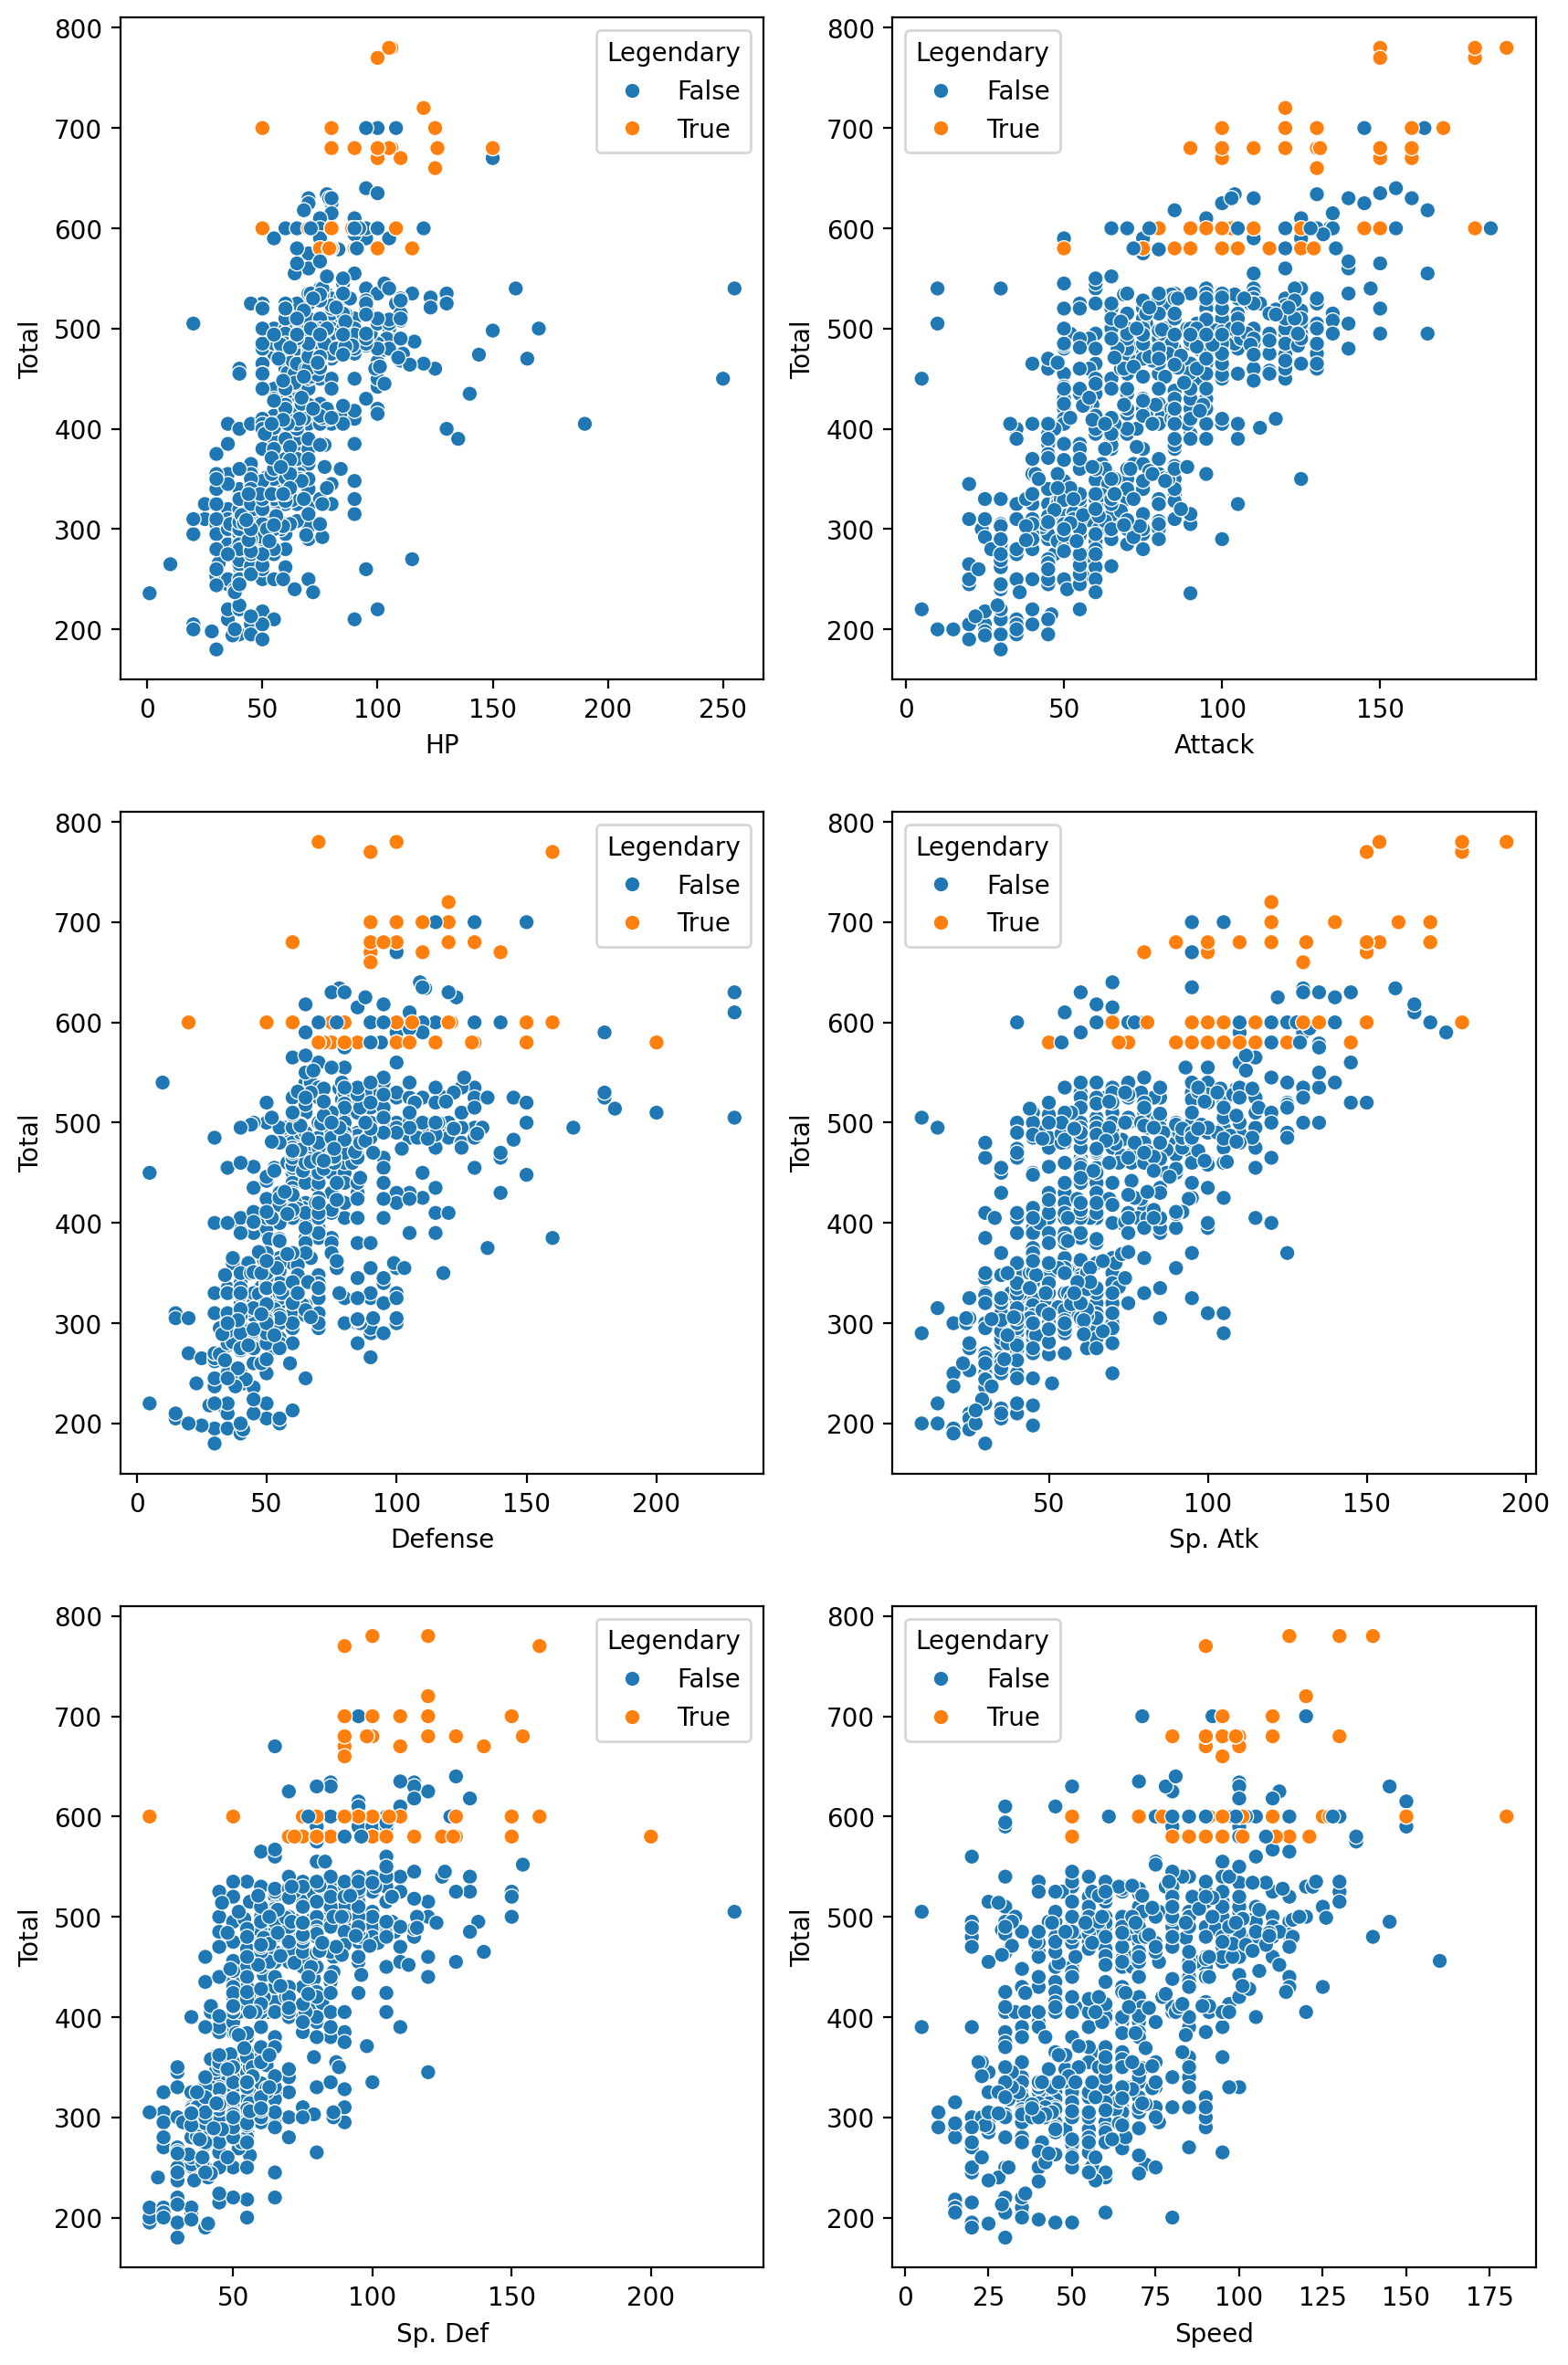

In [160]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 16)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

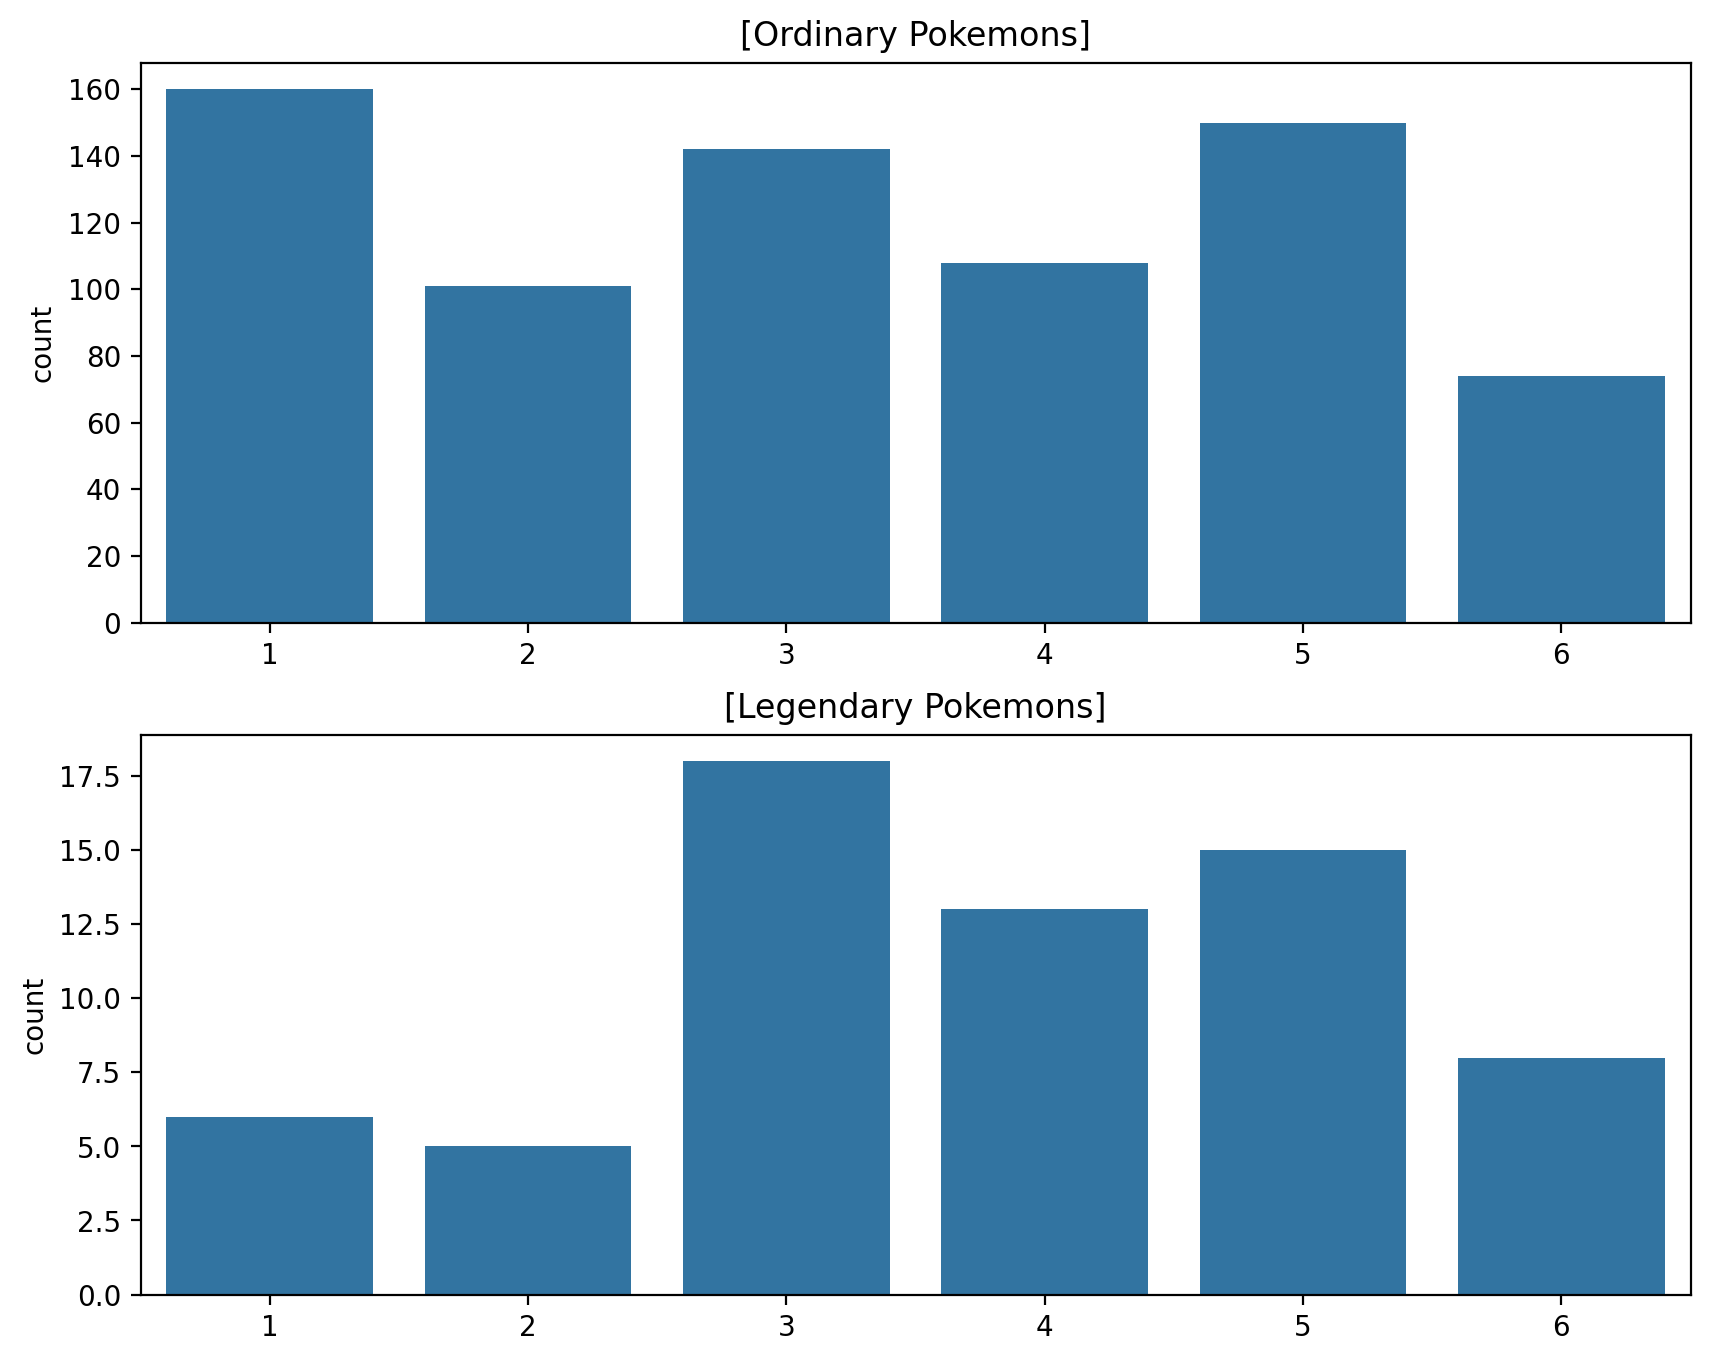

In [161]:
# 각 세대에 대한 포켓몬 수 확인
plt.figure(figsize=(10, 8))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

## 3. 일반 포켓몬과 전설의 포켓몬의 차이

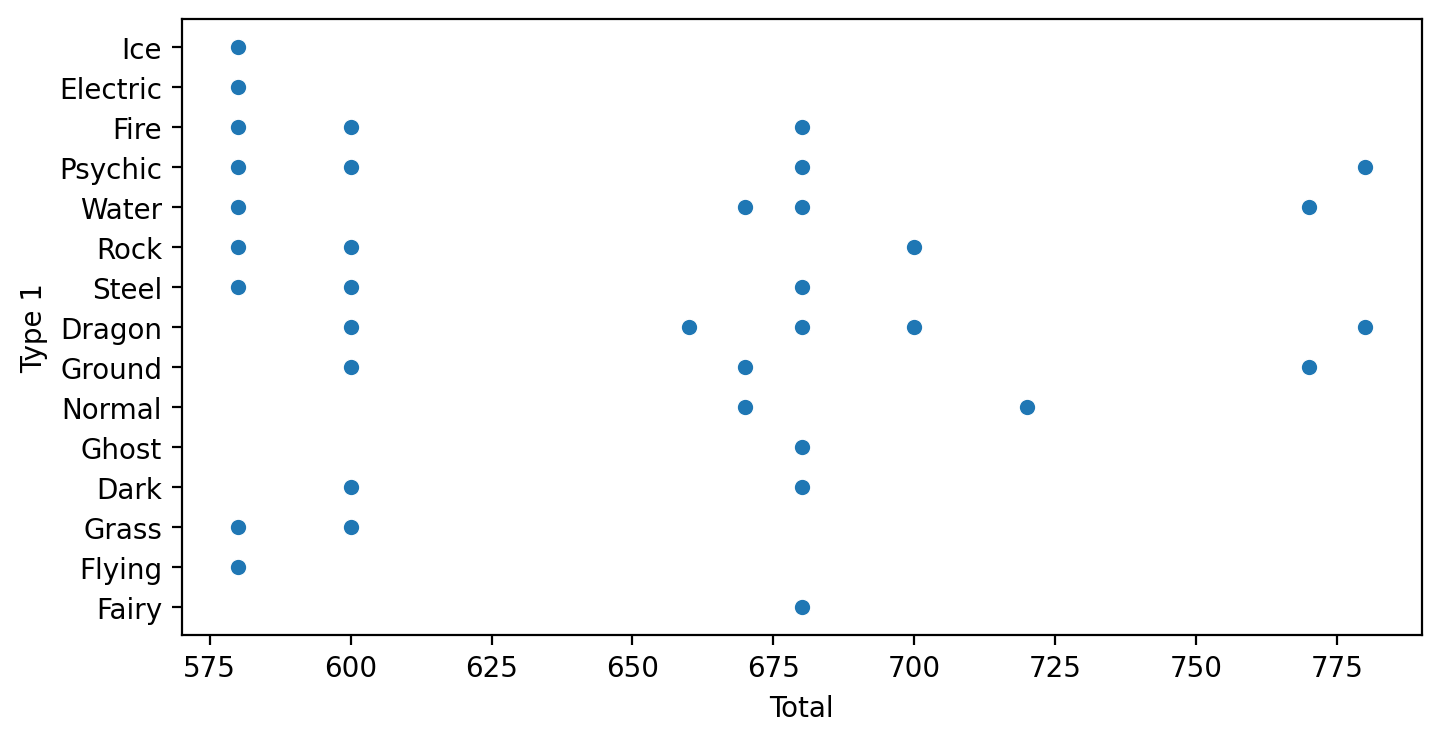

In [162]:
# 전설의 포켓몬 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

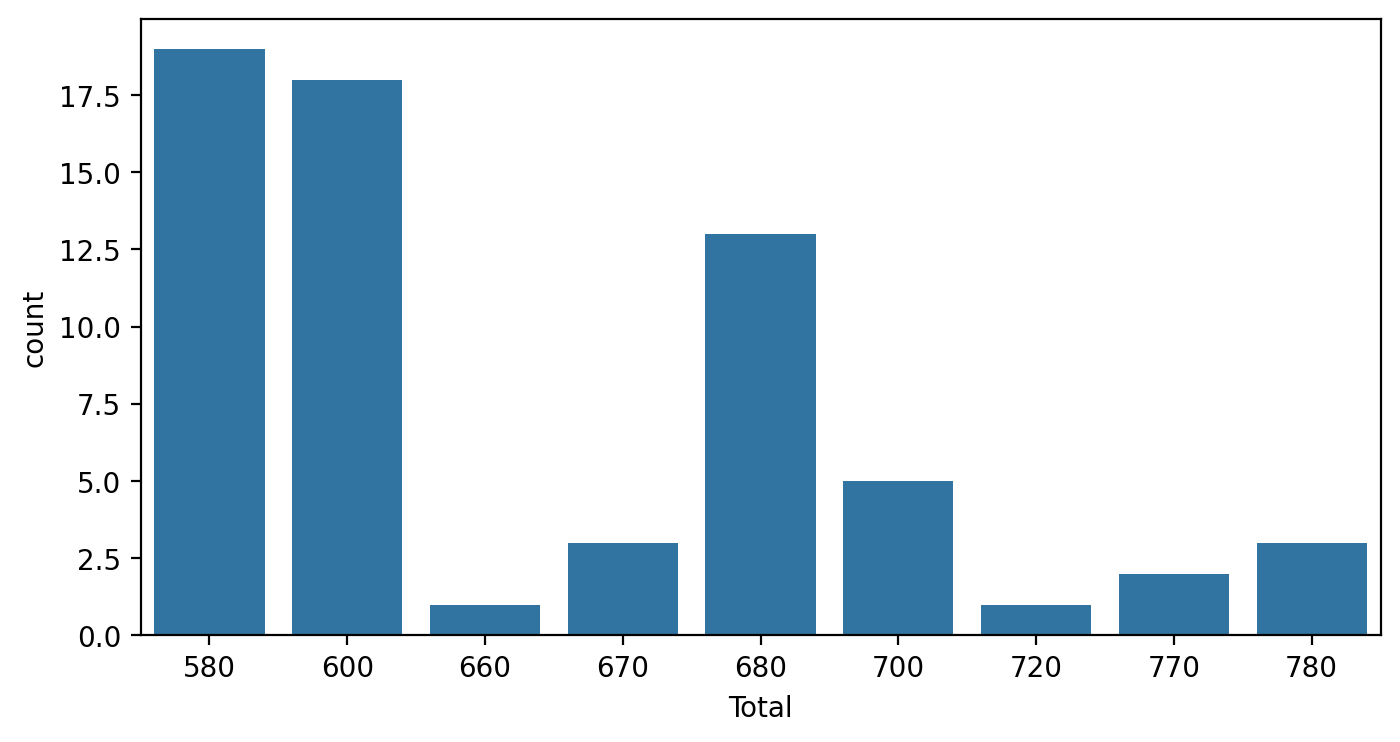

In [163]:
# 전설의 포켓몬 Total 값 그래프 별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [164]:
round(65 / 9, 2) # 결과값으로 보아 약 7.22마리 끼리는 같은 Total 스탯 값을 가진다.

7.22

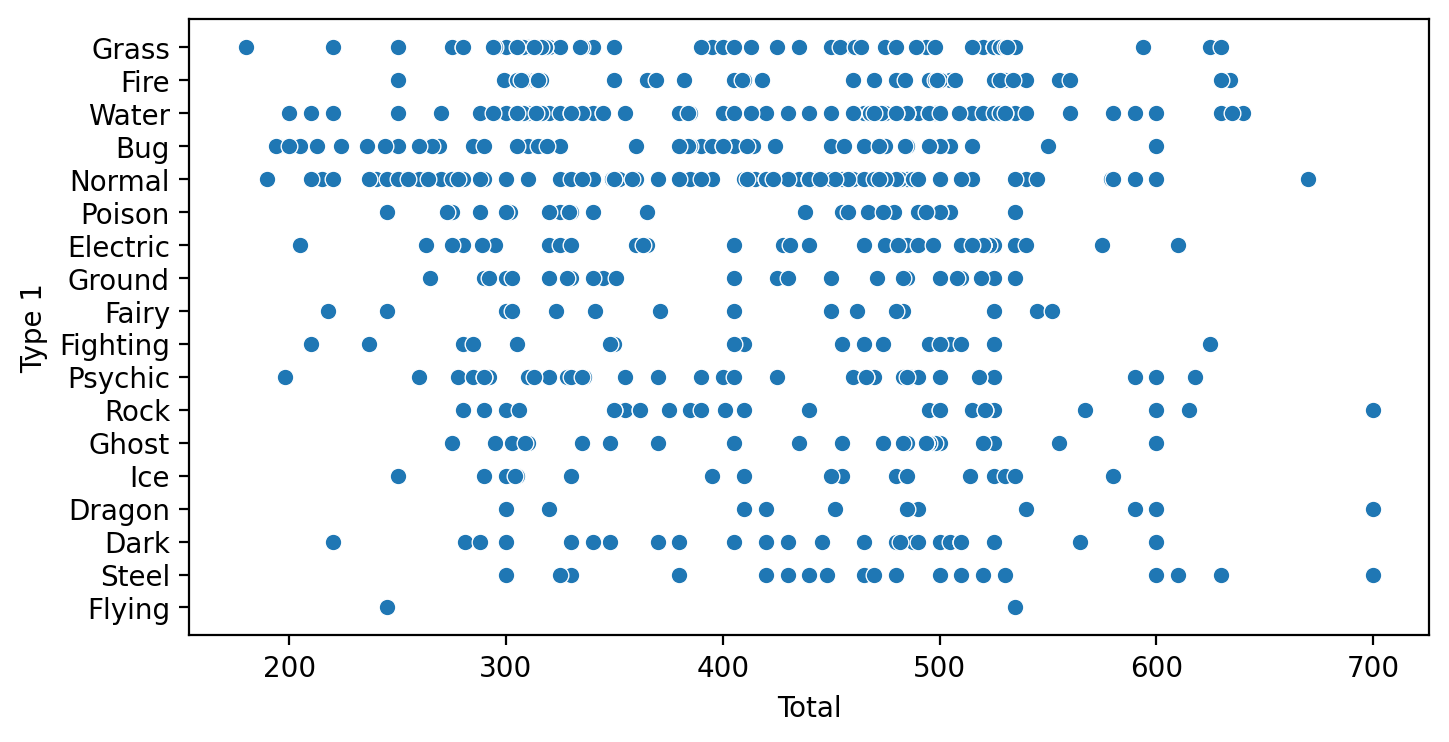

In [165]:
# 일반 포켓몬 Total 값을 속성(Type 1)별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [166]:
round(735 / 195, 2) # 결과값으로 보아 약 3.77마리만 같은 Total 스탯 값을 가진다.

3.77

```
Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.
```

In [167]:
# 비슷한 이름을 가진 포켓몬들 합쳐보기
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [168]:
# Forme 가 들어가는 전설의 포켓몬
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [169]:
# 'name_count' 컬럼 생성
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [170]:
# 'name_count' 컬럼 생성
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


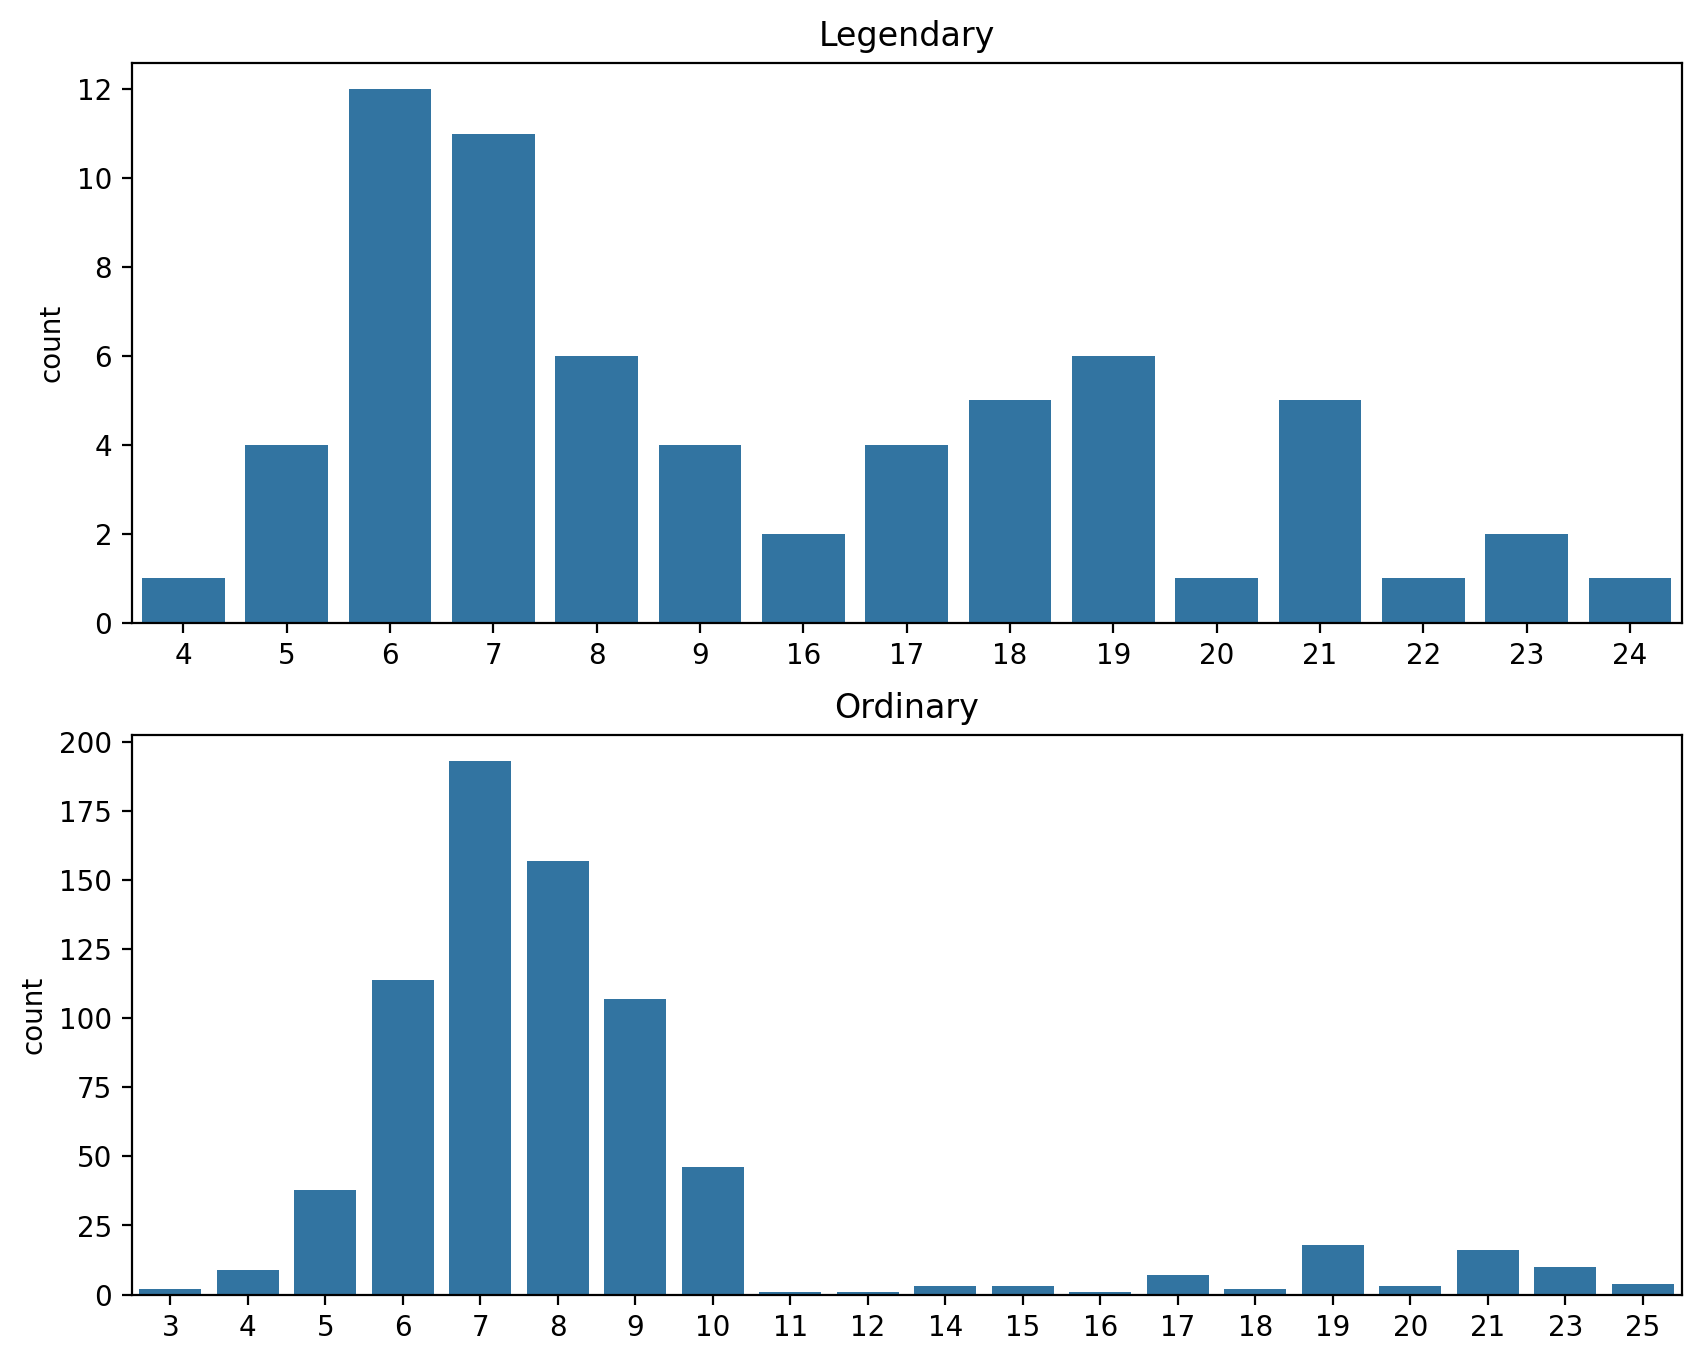

In [171]:
# name_count 컬럼의 특징 확인
plt.figure(figsize=(10, 8))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [172]:
# 전설의 포켓몬이 10 이상의 이름을 가질 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [173]:
# 일반 포켓몬이 10 이상의 이름을 가질 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


```
위 결과로 16 이상의 긴 이름을 가진 포켓몬은 전설의 포켓몬일 확률이 높은 것을 알 수 있습니다.
```

## 4. 모델에 적용하기 위한 데이터 전처리

In [174]:
# 'pokemon' 데이터 프레임에 'name_count' 컬럼 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [175]:
# 이름의 길이가 10 이상일 경우 True 미만일 경우 False를 가지는 'long_name' 컬럼 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


```
- 이름에 자주 쓰이는 토큰 추출
    전설의 포켓몬 이름에 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것.
    어떤 토큰이 포함되어야 전설의 포켓몬일 확률이 높은지 찾아보는 과정.

    포켓몬의 이름은 총 네 가지 타입으로 나뉜다.
      1. 한 단어면 ex. Venusaur
      2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
      3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
      4. 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

```

In [176]:
# 띄어쓰기를 빈칸으로 처리 (띄어쓰기가 있는 경우에 isalpha() = False 처리가 되기 때문)
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [177]:
# 이름이 알파벳으로 이루어졌는지 확인하는 컬럼 생성
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [178]:
# 다른 문자가 포함된 이름 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [179]:
# 이름 수정
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [180]:
# 바꿔준 이름을 다시 처리이후 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


```
이로써 이름은 세가지 타입으로 토큰화 가능
이름에 있는 토큰을 추출하기 위해 토큰화 할 수 있는 함수 생성이 필요하며, 문자열을 처리할 때는 주로 정규표현식 기법 사용.
```

In [181]:
# 정규식 re 패키지 사용
import re

In [182]:
# 예제
name = "CharizardMega Charizard X"

In [183]:
# 공백을 기준으로 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [184]:
# 리스트의 첫 번째 요소 'temp' 변수에 저장
temp = name_split[0]
temp

'CharizardMega'

In [185]:
# 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하는 과정
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [186]:
# 위의 과정을 반복해 토큰 수집
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [187]:
# 모든 이름에 적용 할 수 있는 함수 생성
def tokenize(name):
    name_split = name.split(" ")

    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(tokens)

In [188]:
# 함수를 이용한 토큰화
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [189]:
# 전설의 포켓몬의 이름에 사용된 토큰 수집
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

```
중복을 제외한 총 65개의 토큰 확인

list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리합니다.
collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공합니다.
```

In [190]:
from collections import Counter

In [191]:
# 각 요소가 몇 개인지를 튜플 리스트로 보여주는 예시
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [192]:
# 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해주는 함수
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [193]:
# 인자로 원하는 갯수를 넣는 만큼 출력
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [194]:
# 전설 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지를 보여주는 컬럼 생성
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


```
이름에 맞게 True 또는 False 처리가 된 것을 확인할 수 있다.
해당 토큰이 True 라면 전설의 포켓몬일 확률이 높다.
```

- 범주형 데이터 전처리
```
    범주형 데이터인 Type 컬럼을 처리
    Type은 한 가지 속성을 가지느냐, 두 가지를 가지느냐에 따라 NaN 값이 있을 수도 없을 수도 있다.

    따라서 다음과 같은 규칙으로 범주형 데이터를 전처리한다.
      - 18가지의 모든 Type를 모두 원-핫 인코딩합니다.
      - 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.
```

In [195]:
# Type 리스트 가져오기
print(types)

['Bug', 'Electric', 'Flying', 'Normal', 'Rock', 'Fire', 'Ice', 'Fighting', 'Dark', 'Steel', 'Dragon', 'Ground', 'Grass', 'Poison', 'Water', 'Fairy', 'Ghost', 'Psychic']


In [196]:
# 원-핫 인코딩 처리
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Bug,Electric,Flying,Normal,Rock,Fire,Ice,Fighting,Dark,Steel,Dragon,Ground,Grass,Poison,Water,Fairy,Ghost,Psychic
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,Fire,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


```
0번 포켓몬의 경우 첫 번째 속성이 풀, 두번째 속성이 독이며, 그에 맞는 컬럼만 True 값을 가짐으로써 원-핫 인코딩이 잘 된것으로 확인 가능
```

## 5. 베이스라인 만들기

- 베이스 라인이란?
```
가장 기초적인 방법으로 만든 모델.
베이스라인 모델은 성능은 안 좋을지 모르지만,성능 하한선을 제공함으로써
우리가 새롭게 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있게 도와줍니다.
```

In [197]:
# 'original_data' 불러오기
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [198]:
# 컬럼 확인
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [199]:
# '#', Name, Type 1, Type 2, Legendary 컬럼 제외
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [200]:
# target 데이터인 Legendary 변수 저장
target = 'Legendary'

In [201]:
# X 변수에 features 컬럼에 해당하는 데이터 저장
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [202]:
# y 변수에 target 컬럼에 해당하는 데이터 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [209]:
# 학습 데이터와, 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


## 6. 의사 결정 트리 모델을 이용한 학습 시키기

In [210]:
# 의사 결정 트리 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [211]:
# random_state 는 모델의 랜덤성을 제어. (어떤 값을 넣어도 상관없지만, 실험 단계에서는 랜덤성에 의해 학습 결과가 차이 나는 것을 방지하기 위해 하나의 값으로 고정)
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [212]:
# 모델 학습
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [213]:
# 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

```
위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.
즉 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개뿐이니 나쁘지 않은 결과라고 할 수 있다.

하지만 전체 포켓몬 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다.

이는 92%의 정확도로 모델의 정확도 95%로 꽤 높은 값을 가졌지만 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.

```

In [214]:
# classification_report 활용
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



```
위의 recall 값 0.62
Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻한다.
즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많다.
이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다.
```

## 7. 피쳐 엔지니어링 데이터로 학습 시키기

In [215]:
# 앞서 처리했던 컬럼 확인
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Bug', 'Electric', 'Flying', 'Normal', 'Rock', 'Fire', 'Ice',
       'Fighting', 'Dark', 'Steel', 'Dragon', 'Ground', 'Grass', 'Poison',
       'Water', 'Fairy', 'Ghost', 'Psychic'],
      dtype='object')


In [216]:
# 사용할 컬럼을 추려 features 변수에 저장 (머신러닝 모델에는 문자열을 입력할 수 없다.)
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [217]:
# 정답 데이터 준비
target = "Legendary"
target

'Legendary'

In [218]:
# 모델에 사용할 데이터를 X 변수에 저장
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [219]:
# 정답 데이터를 변수 y에 저장
y = pokemon[target]
print(y.shape)
y.head()

(800,)


,Legendary
0,False
1,False
2,False
3,False
4,False


In [220]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [221]:
# 의사 결정 트리를 활용한 모델 학습
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [222]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [223]:
#결과 확인
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



```
데이터 전처리 과정을 통해 위의 recall 값이 0.62에서 0.92 까지 상승된 것으로 확인
```